## EDA

Add imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read wrangled data and store into dataframe

In [22]:
df = pd.read_csv("../wrangler/wrangled_data.csv", encoding="utf-8")
df.head()

,Video Id,Original Title,Title,Views,Length,Channel,Search word,Most watched,Uppercase Words,Lowercase Words,Capitalized Words,Word Count
0,---AKxmFRWI,Dharmesh Yalande Sir Dance Bastar Dist Chhatti...,dharmesh yaland sir danc bastar dist chhattisg...,8867396,0.27,/@bastarfiles,['dist'],Y,0,0,13,13
1,---jp8dVvkY,Fed Will Likely Hike in September - Market Pul...,fed hike septemb market pul rufa kamau,144,26.55,/@FXPesa,['pulse'],N,0,2,9,11
2,--0HXqi8xTk,Hyundai i20 at 25% Discount,hyundai discount,798201,0.59,/@bekifaayati,['discounted'],Y,0,2,2,5
3,--0Qq5EmpGg,PSY - GANGNAM STYLE (CONVERSELY),psi gangnam style conver,424,4.13,/@maxchet,['conversely'],N,4,0,0,4
4,--1bxl5E-u8,Firmly I Believe and Truly God is Three (Halto...,firmli god halton holgat,5143,1.29,/@AndrewRemillard,['firmly'],N,1,2,8,10


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439393 entries, 0 to 439392
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Video Id           439393 non-null  object
 1   Original Title     439393 non-null  object
 2   Title              438843 non-null  object
 3   Views              439393 non-null  int64 
 4   Length             439393 non-null  object
 5   Channel            439393 non-null  object
 6   Search word        439393 non-null  object
 7   Most watched       439393 non-null  object
 8   Uppercase Words    439393 non-null  int64 
 9   Lowercase Words    439393 non-null  int64 
 10  Capitalized Words  439393 non-null  int64 
 11  Word Count         439393 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 40.2+ MB


Delete NaN titles. For some reason wrangler writes few empty Titles even they are supposed to be removed earlier

In [24]:
print(df.isna().sum())
df.dropna(inplace=True)

Video Id               0
Original Title         0
Title                550
Views                  0
Length                 0
Channel                0
Search word            0
Most watched           0
Uppercase Words        0
Lowercase Words        0
Capitalized Words      0
Word Count             0
dtype: int64


Plotting wordcount with views.

<AxesSubplot:>

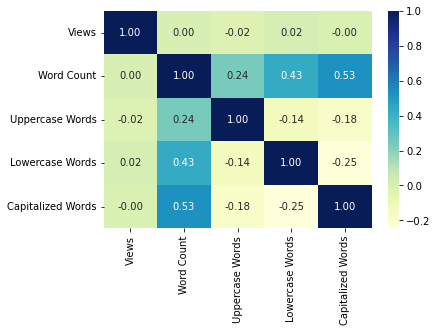

In [25]:
columns_test = df[['Views','Word Count', 'Uppercase Words', 'Lowercase Words', 'Capitalized Words']]

sns.heatmap(columns_test.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")

In [26]:
print("Median views total: ", df["Views"].median())
print("Average/mean views total: ", df["Views"].mean())

d = {}

TEST_LINES = 100000

for _, row in df.iterrows():
  TEST_LINES -= 1
  if TEST_LINES == 0:
    break
  for w in row.Title.split():
    if w in d:
      t = d[w]
      d[w] = (t[0] + row["Views"], t[1] + 1)
    else:
      d[w] = (row["Views"], 1)

# print(d)

d2 = {}

sum_of_averages = 0

for key, val in d.items():
  ave = val[0] / val[1]
  d2[key] = ave
  sum_of_averages += ave

# print(d2)

ave_views_per_word = sum_of_averages / len(d2)
print("Average/mean of average/mean views per word", ave_views_per_word)


sorted_d2 = dict(sorted(d2.items(), key=lambda item: item[1], reverse=True))

# print(sorted_d2)

Median views total:  905892.0
Average/mean views total:  14688918.518317485
Average/mean of average/mean views per word 15140081.173026128


In [27]:
n = 10

sorted_d2_list = list(sorted_d2.items())

print(f"Highest {n} ave views words\n")
for i in range(n):
  print(sorted_d2_list[i])

print("\n\n")

print(f"Lowest {n} ave views words\n")
for i in range(n):
  print(sorted_d2_list[len(sorted_d2_list) - i - 1])

Highest 10 ave views words

('bicicleta', 1616768813.0)
('gaj', 1559330576.0)
('daman', 1559330576.0)
('jaji', 1559330576.0)
('renuka', 1559330576.0)
('queijo', 1514722351.0)
('zaroori', 1502668195.0)
('pillowtalk', 1181301044.0)
('amarelinho', 1167446448.0)
('gangnam', 1024085582.6)



Lowest 10 ave views words

('llwl', 1.0)
('firstgov', 1.0)
('heimdal', 1.0)
('shivamsingh', 1.0)
('myoneth', 2.0)
('ivtool', 3.0)
('dhonijadeja', 3.0)
('psilocyben', 3.0)
('microdo', 3.0)
('jelsoft', 3.3333333333333335)


In [30]:
# d3 is hashmap of words with key=word, value=(average_views, z-index)
# z-index is the mesurment of how much the value(average_views) deviates form the norm. The closer to zero the more average it is
d3 = {}

standard_deviation = np.std(df["Views"])

for key, val in d2.items():
  z_index = (val - ave_views_per_word) / standard_deviation
  d3[key] = (val, z_index)


sorted_d3 = dict(sorted(d3.items(), key=lambda item: item[1], reverse=True))

In [31]:
sorted_d3_list = list(sorted_d3.items())

print(f"Highest {n} ave views words\n")
for i in range(n):
  print(sorted_d3_list[i])

print("\n\n")

print(f"Lowest {n} ave views words\n")
for i in range(n):
  print(sorted_d3_list[len(sorted_d2_list) - i - 1])

Highest 10 ave views words

('bicicleta', (1616768813.0, 28.24749551984912))
('gaj', (1559330576.0, 27.2344727698921))
('daman', (1559330576.0, 27.2344727698921))
('jaji', (1559330576.0, 27.2344727698921))
('renuka', (1559330576.0, 27.2344727698921))
('queijo', (1514722351.0, 26.44772949362822))
('zaroori', (1502668195.0, 26.23513358370273))
('pillowtalk', (1181301044.0, 20.567267506060546))
('amarelinho', (1167446448.0, 20.32291771970719))
('gangnam', (1024085582.6, 17.794500663596537))



Lowest 10 ave views words

('llwl', (1.0, -0.2670215252506557))
('firstgov', (1.0, -0.2670215252506557))
('heimdal', (1.0, -0.2670215252506557))
('shivamsingh', (1.0, -0.2670215252506557))
('myoneth', (2.0, -0.26702150761392446))
('ivtool', (3.0, -0.2670214899771932))
('dhonijadeja', (3.0, -0.2670214899771932))
('psilocyben', (3.0, -0.2670214899771932))
('microdo', (3.0, -0.2670214899771932))
('jelsoft', (3.3333333333333335, -0.2670214840982828))
